In [99]:
import pandas as pd

In [100]:
dataset=pd.read_csv("Preprocessed Tamil Nadu ChatGPT Data.csv")

In [101]:
independent = dataset[['Gender', 'District', 'Occupation', 'Usage Frequency', 'Language Used', 'Education Level','Actions Taken', 'Time Spent Hours']] #assigning single column to separate variable
dependent = dataset[["Main Purpose"]]

In [102]:
from sklearn.model_selection import train_test_split #importing a function from library
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0) 

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
classifier.fit(x_train,y_train)

C:\Anaconda\envs\aiml\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = classifier.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8484848484848485
Precision: 0.8580808080808081
Recall: 0.8484848484848485
F1 Score: 0.8478691678691679

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.80      1.00      0.89         8
           2       1.00      0.75      0.86         4
           3       0.92      0.85      0.88        13
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3

    accuracy                           0.85        33
   macro avg       0.87      0.85      0.85        33
weighted avg       0.86      0.85      0.85        33



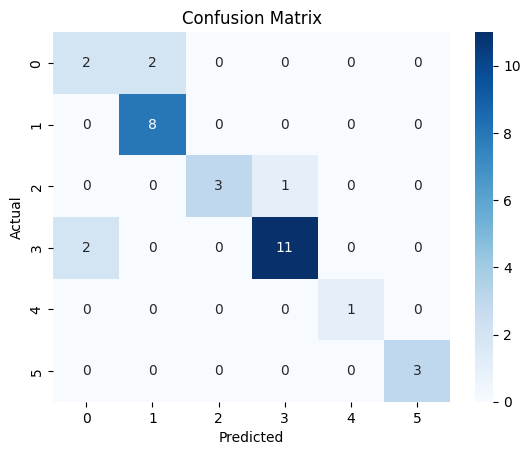

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [107]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.6821100917431193

In [108]:
import pickle
filename="finalized_model_RandomForest.sav" #creating filename
pickle.dump(classifier,open(filename,'wb'))

In [109]:
x_train_original = sc.inverse_transform(x_train)
x_test_original = sc.inverse_transform(x_test)

In [112]:
loaded_model=pickle.load(open("finalized_model_RandomForest.sav",'rb'))
# Load the saved label encoder
with open("target_label_encoder.pkl", "rb") as f:
    target_le = pickle.load(f)
result=loaded_model.predict([[1,0,10,3,1,2,1,0.5]]) 
decoded_result = target_le.inverse_transform(result)


In [113]:
print(decoded_result)

['Education/ Exam Preparation']
